# Project notebook **<span style="COLOR:RED">(complete this cell)</span>**


### Student 1 (first half presentation)
Name : Valentin Lapparov
<br>Group : advanced
### Student 2 (second half presentation)
Name : Sacha Izadi
<br>Group : advanced
### Data name : Mercari price suggestion challenge
### Data URL : https://www.kaggle.com/c/mercari-price-suggestion-challenge/download/train.tsv.7z
### Short summary of the project and datasource :
<span style="COLOR:RED">Should be a few lines maximum</span>

# General instructions (this cell might be deleted for submission)
** <span style="color:red"> Write all the project in this file : code and explanations and upload it before January 7th at 23:55 </span> ** : 

<span style="color:red">Remember : Code cells must be smaller than 30 lines </span>

Every thing must be in the notebook :

* Explanation of what you want to do with data should be present in the Notebook
* Download data in the notebook (check the URL availability) and give the source of data (both URL and textual description)
* Give as much as possible characteristics of data (size, type, fields, ...)
* Provide visualisation of the data that you think useful
* Check for the consistence of the dataset (error, missing data,...) and correct and/or delete errors
* **Ask yourself a question that request you to perform an estimation** (for example, you can choose a data depending on time, and try to predict the latest 10% of data knowing the rest of data). **This will typically be solved through the proposal of a model and fitting the parameters of the model to (part of) the data.**

If you end up writing long chunks of code, make sure you split it in logical «smaller code cells» and explain the logic. The Juptyer Notebook will be **both the memoire** you will submit for evaluation **and the visual support** for your oral presentation of your project, keep this in mind while writing it.

### Aims : 
** <span style="color:red"> Here explain what you what to do with data</span> ** 
* 
* 
* 

### Download : 
** <span style="color:red">Write explanations here</span> ** 
* 
* 
* 

In [154]:
######## Import what is needed ###########

## pip install some packages (uncomment the following lines if necessary).
# ! pip install squarify


import urllib.request as ur
import pandas as pd
import pickle
import seaborn as sns #seaborn is a library for plotting densities
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import squarify

%matplotlib inline 

In [24]:
######## donwload data ###########
import urllib.request as ur

print('Downloading data...')
data_file = 'train_tsv.7z'
ur.urlretrieve ("https://www.kaggle.com/c/mercari-price-suggestion-challenge/download/train.tsv.7z", data_file)
print('Download complete.')

Download complete.


** <span style="color:red">If there is any obvious data curation to be performed upon initial data loading, do it here</span> ** 



In [30]:
####### unzip file ###########

# >>> Uncomment the following line to install the packages needed for unzipping
#! pip install pyunpack
#! pip install patool
from pyunpack import Archive
data_file = 'train_tsv.7z'
print('Unzipping')
#Archive(data_file).extractall('Data',auto_create_dir=True)
print('Done!')



### >>> Je n'arrive pas à unzipp le dossier depuis Python, pour l'instant je le fais à la main ...


Unzipping
Done!


In [2]:
print("Loading the dataset in a pandas DataFrame...")
data_mercari = pd.read_csv('Data/Mercari_data.tsv', sep='\t')
print("Loading completed.")

Loading the dataset in a pandas DataFrame...
Loading completed.


In [36]:
pd.DataFrame.head(data_mercari)

,name,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description
1,Razer BlackWidow Chroma Keyboard,Electronics,Computers & Tablets,Components & Parts,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,Women,Tops & Blouses,Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
6,Acacia pacific tides santorini top,Women,Swimwear,Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,Girls cheer and tumbling bundle of 7,Sports & Outdoors,Apparel,Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,Girls Nike Pro shorts,Sports & Outdoors,Apparel,Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


In [8]:
data_mercari.drop('train_id',axis=1,inplace=True) ## Remove train_id because it's useless
data_mercari.dtypes #check the consistency of the data type

name                 object
main_cat             object
subcat_1             object
subcat_2             object
brand_name           object
price               float64
shipping              int64
item_description     object
dtype: object

In [7]:
print ("Percentage of NaN in the dataset (%)") ## Check the proportion of NaN in the dataset
print(data_mercari.isnull().sum()/data_mercari.size*100)

Percentage of NaN in the dataset (%)
name                 0.000000
item_condition_id    0.000000
category_name        0.060967
brand_name           6.096527
price                0.000000
shipping             0.000000
item_description     0.000039
dtype: float64


In [8]:
# As there is only few NaN, removing them won't change the analysis too much
data_mercari=data_mercari[pd.notnull(data_mercari['item_description'])]
data_mercari=data_mercari[pd.notnull(data_mercari['category_name'])]
data_mercari=data_mercari[pd.notnull(data_mercari['brand_name'])]

In [9]:
# Let's split the categories like "Electronics/Computers & Tablets/Components & Parts" into main & sub categories
data_mercari['main_cat'], data_mercari['subcat_1'], data_mercari['subcat_2'] = \
data_mercari['category_name'].str.split('/', 2).str

In [10]:
# Reordering the dataset
data_mercari.drop('category_name',axis=1,inplace=True)
cols = data_mercari.columns.values.tolist()
cols = cols[0:1] + cols[-3:] + cols[2:6]
data_mercari = data_mercari[cols]

In [11]:
pd.DataFrame.head(data_mercari)

,name,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description
1,Razer BlackWidow Chroma Keyboard,Electronics,Computers & Tablets,Components & Parts,Razer,52.0,0,This keyboard is in great condition and works ...
2,AVA-VIV Blouse,Women,Tops & Blouses,Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
6,Acacia pacific tides santorini top,Women,Swimwear,Two-Piece,Acacia Swimwear,64.0,0,Size small but straps slightly shortened to fi...
7,Girls cheer and tumbling bundle of 7,Sports & Outdoors,Apparel,Girls,Soffe,6.0,1,You get three pairs of Sophie cheer shorts siz...
8,Girls Nike Pro shorts,Sports & Outdoors,Apparel,Girls,Nike,19.0,0,Girls Size small Plus green. Three shorts total.


In [12]:
# Pickeling the datacleaning for using it later on
data_mercari.to_pickle("data_mercari_cleaned.pickle")

In [3]:
# Opening the Pickle data
with open('data_mercari_cleaned.pickle', 'rb') as f:
    data_mercari = pickle.load(f)

### Data charaterisctics :  Here, give as much as possible characteristics of data
** <span style="color:red"> Write explanations here</span> ** 
* 
* 
* 

# Price analysis
A utiliser :
- np.array
- define classes (Day3 Notebook)
- matplotlib (Coutour plots with projections)
- %matplotlib inline
- least-square Day5
- pandas Day5 : 
    • access data : df.iloc[[0,2],:] ou df.iloc[0,2]
    • access data by index : df2.loc['Bar'] 
    • group_by : group_obj = fns.groupby(('preusuel','sexe')) #only 1 parameter
    • >> it's an iterator : for name, group in group_obj
    • Applying a function to each group with agg function : 
        A_fns = fns.groupby(('preusuel','sexe')).agg({'nombre': sum})
    • Applying a function to each group with transform function :
        T_fns = fns.groupby(('preusuel','sexe')).transform(sum)
    • Selecting groups with filter function :
        F_fns = fns.groupby(('preusuel','sexe')).filter(lambda x: x['nombre'].sum() >=1000)
- PCA Day 5 :
    import sklearn.decomposition
    iris_pca = sklearn.decomposition.PCA()
    iris_proj = iris_pca.fit_transform(X)
    
- use sktlearn




In [ ]:
#DON'T RUN


#Vu dans Day 4 :
from collections import Counter, namedtuple
word_stat = namedtuple('word_stat','word length repetition')

def as_str(x):
    return("{}\t{}\t{}\n".format(x.word, x.length, x.repetition))

with open("lorem-ipsum.txt", mode='r') as f :
    lines = f.readlines()
    words = sum([l.split() for l in lines],[])
    cnt = Counter(words)
    full_stat = [word_stat(w, len(w), r) for w,r in cnt.items()]
    sorted_stat = sorted(full_stat, key = lambda x : x.repetition, reverse=True)
    out_lines = [as_str(ws) for ws in sorted_stat]
    with open("lorem-ipsum.dat",mode='w+') as out_file:
        out_file.writelines(out_lines)

#print(words)
#print(cnt)
#print(full_stat)
#print(sorted_stat)

In [ ]:
#DON'T RUN

#Spotted dans le notebook PCA :
## Some visualisation
import numpy
import matplotlib
import matplotlib.pyplot as pyplot
%matplotlib inline

bins=numpy.linspace(X[::, 0].min(),X[::, 0].max(), 20)

for c in numpy.unique(cl) :
    pyplot.hist(X[cl==c, 0], bins, alpha=0.5, label=c)
pyplot.legend(loc='upper right')
pyplot.xlabel(iris.columns.values[0])
pyplot.show()

Let's first do some basic statistics on the `price` variable. We see that most of the prices lie between 0 and 30 but some items are sold for free (min=0) whereas others are very expensive !

In [9]:
data_mercari.price.describe()

count    846982.000000
mean         30.917965
std          44.742851
min           0.000000
25%          12.000000
50%          20.000000
75%          34.000000
max        2009.000000
Name: price, dtype: float64

To better see it we plot the density of price using the library `seaborn` based on matplotlib and specially designed for statistical vizualisation.

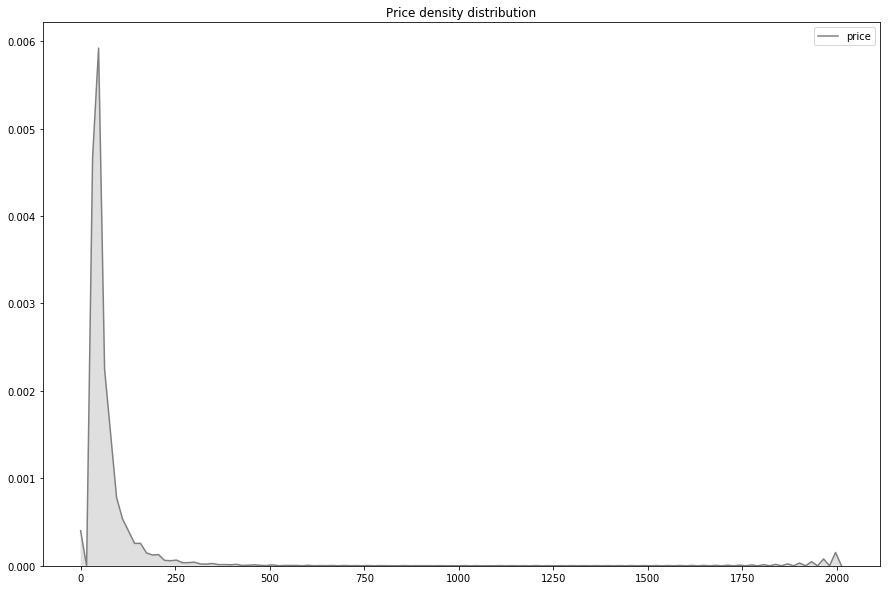

In [47]:
plt.figure(figsize=(15,10)) 
plt.title('Price density distribution')
sns.kdeplot(data_mercari['price'], shade=True, color="grey")

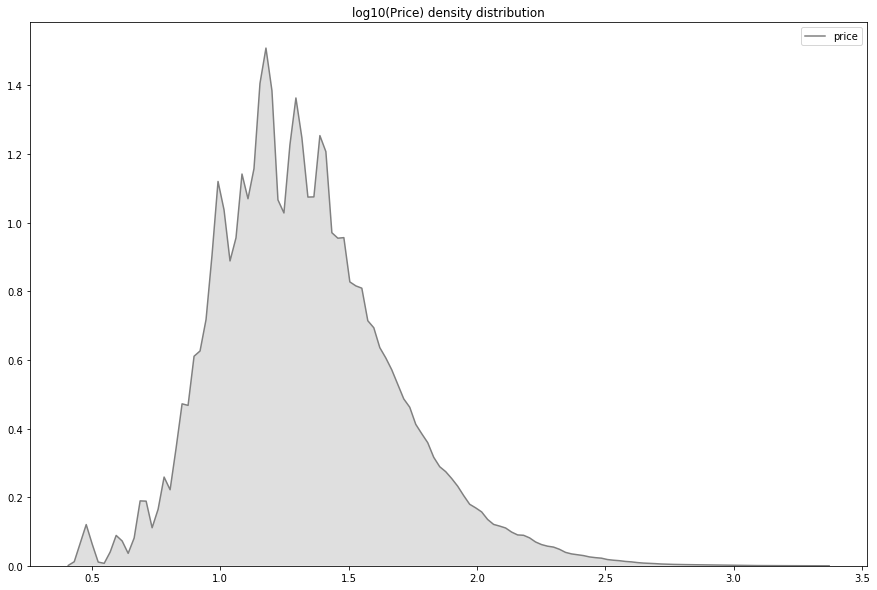

In [56]:
# As prices varie between $0 and $2000 with a high concentration around $30, we can have a better view 
# by plotting the log10(price) density distribution

plt.figure(figsize=(15,10)) 
plt.title('log10(Price) density distribution')
sns.kdeplot(np.log10(data_mercari.price[data_mercari.price!=0]), shade=True, color="grey")

Let's see who the outliers (`price` = \$0 and `price` > \$1900) are.

In [70]:
pd.DataFrame.head(data_mercari[data_mercari.price==0])

,name,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description


In [35]:
data_mercari[data_mercari.price > 1900]

,name,main_cat,subcat_1,subcat_2,brand_name,price,shipping,item_description
180749,NEW apple products,Electronics,Cell Phones & Accessories,Cell Phone Accessories,Apple,1909.0,0,"bundle includes: ipad pro keyboard, iphone 6S ..."
415027,Chanel Classic Jumbo Single flap bag,Women,Women's Handbags,Shoulder Bag,Chanel,2000.0,1,Authentic. Pre-loved in Excellent Condition. P...
742113,Chanel Chevron Fuschia Pink 2,Women,Women's Handbags,Shoulder Bag,Chanel,2000.0,1,Authentic Brand new The price for this is [rm]...
760469,NEW Chanel WOC Caviar Gold Hardware,Women,Women's Handbags,Shoulder Bag,Chanel,2009.0,0,"New with tag, box and dustbag but no receipt. ..."
778940,Mary kay,Beauty,Makeup,Face,Mary Kay,2000.0,1,30 time wise sets Oily to combo skin
956343,Chanel Black wallet on chain,Women,Women's Handbags,Messenger & Crossbody,Chanel,2000.0,1,Lambskin Color is Black with dark Silver Hardw...
1250053,Brand New Chanel CC Quilted WOC,Women,Women's Handbags,Messenger & Crossbody,Chanel,2000.0,1,This is a brand new Chanel CC Quilted Wallet o...
1262245,NEW-Chanel Boy Wallet o Chain WOC Caviar,Women,Women's Handbags,Messenger & Crossbody,Chanel,2006.0,0,Brand: Chanel Style: WOC Boy Wallet on Chain T...
1393600,David Yurman Wheaton ring,Women,Jewelry,Rings,David Yurman,2004.0,0,David Yurman Wheaton wing. Size 6. Original re...


We see that the very expensive outliers are consistent with the item sold (luxury goods) whereas the free items are not. We will drop all free items in order to keep consistency !

In [44]:
data_mercari = data_mercari[data_mercari.price != 0]
print("Minimum price is now: ",min(data_mercari.price),"! No item is free anymore")

Minimum price is now:  3.0 ! No item is free anymore


In [45]:
data_mercari.to_pickle("data_mercari_cleaned_removeFree.pickle")

Attention aux emoji dans les textes : 1024458

# Shipping

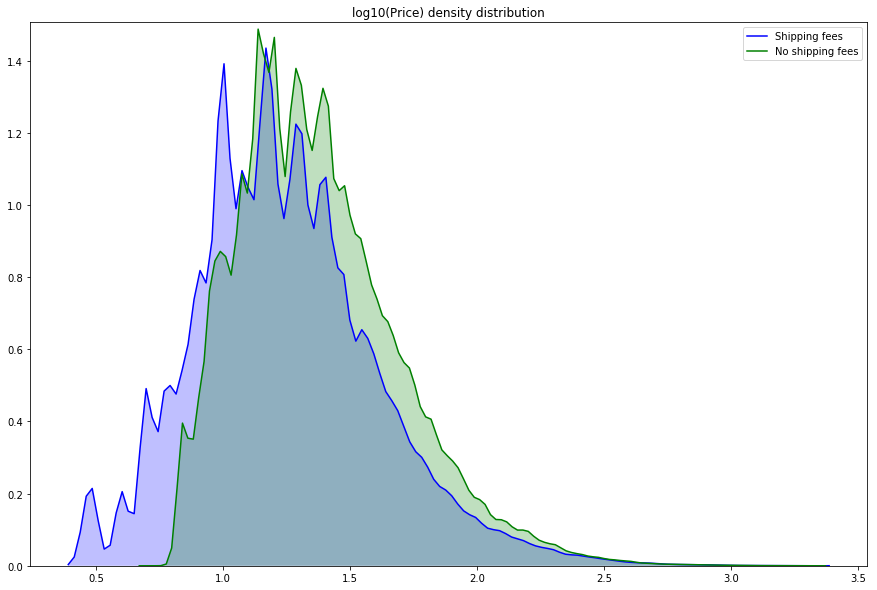

In [67]:
plt.figure(figsize=(15,10))
plt.title('log10(Price) density distribution')
#plt.legend()
sns.kdeplot(np.log10(data_mercari.price[data_mercari.shipping==1]), shade=True, color="blue", label='Shipping fees')
sns.kdeplot(np.log10(data_mercari.price[data_mercari.shipping==0]), shade=True, color="green", label='No shipping fees')

As expected, items with low `prices` require to pay a shipping fee more often than high `prices`. Indeed with high `prices` vendor can lower their margin to bear the cost of shipping.

# Categories

In [79]:
print("There are ", data_mercari.main_cat.nunique()," main categories.")
print("There are ", data_mercari.subcat_1.nunique()," sub-categories of level 1.")
print("There are ", data_mercari.subcat_2.nunique()," sub-categories of level 2.")

There are  10  main categories.
There are  104  sub-categories of level 1.
There are  670  sub-categories of level 2.


In [ ]:
# Je voudrais faire un tree map dynamic pour visualiser les subcat mais j'y arrive pas ...
# collapsible trees avec D3.js

In [155]:
## >>>> Group by main category --> Apply count
## >>> Group by main subcat1 --> Apply count

nb_items_subcat1 = data_mercari.groupby(('main_cat','subcat_1')).agg('count')

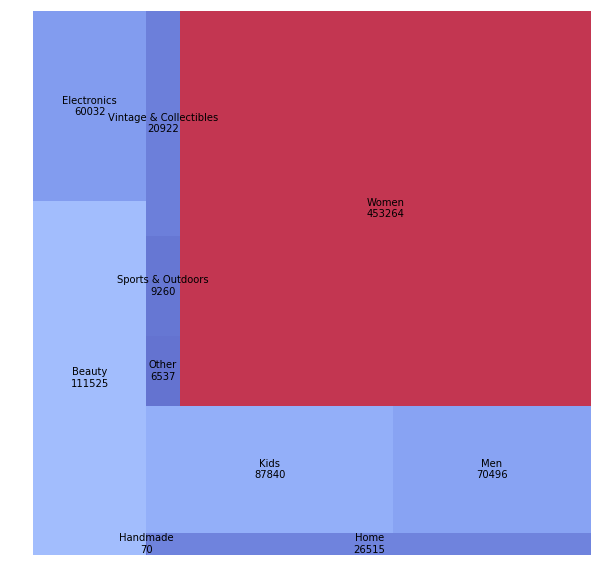

In [204]:
nb_items_main_cat = data_mercari.groupby('main_cat').agg('count')

# create a color palette, mapped to these values
mini=min(nb_items_main_cat.name)
maxi=max(nb_items_main_cat.name)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
cmap = matplotlib.cm.coolwarm
colors = [cmap(norm(value)) for value in nb_items_main_cat.name]

plt.figure(figsize=(10,10))
labels = ["%s\n%d" % (label) for label in zip(nb_items_main_cat.index, nb_items_main_cat.name)]
squarify.plot(sizes=nb_items_main_cat.name, label=labels, color=colors, alpha=.8)
plt.axis('off')
plt.show()

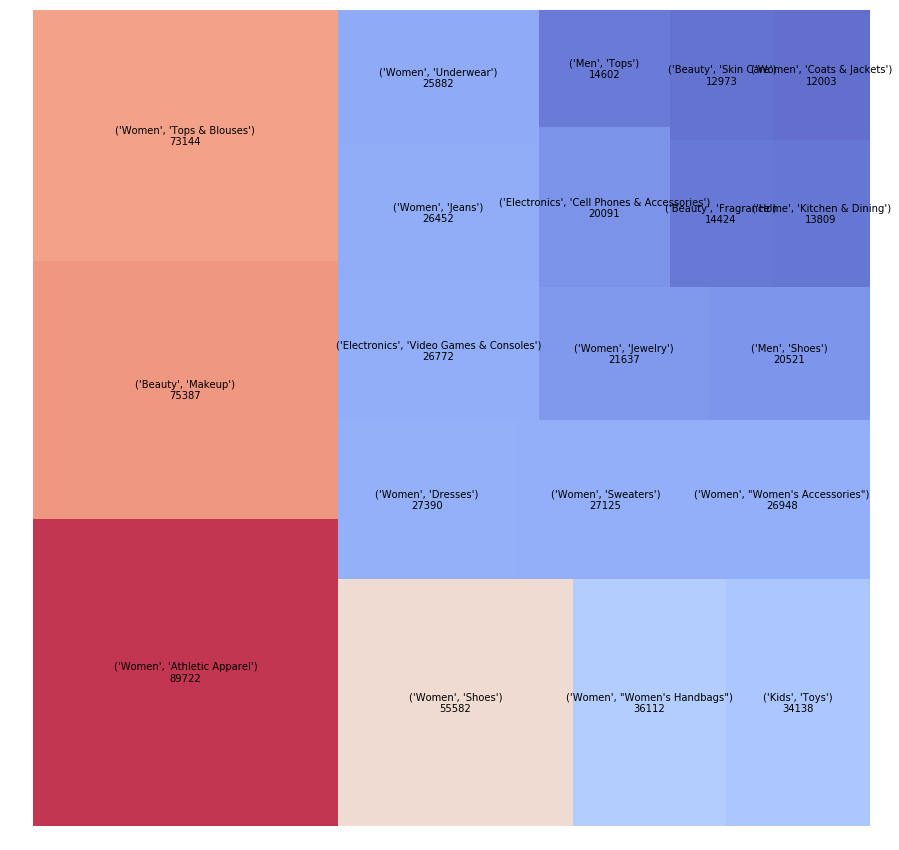

In [210]:
# Change color

toPlot = nb_items_subcat1.sort_values('name', ascending=0).head(20)

mini=min(toPlot.name)
maxi=max(toPlot.name)
norm = matplotlib.colors.Normalize(vmin=mini, vmax=maxi)
cmap = matplotlib.cm.coolwarm
colors = [cmap(norm(value)) for value in toPlot.name]


labels = ["%s\n%d" % (label) for label in zip(toPlot.index, toPlot.name)]

plt.figure(figsize=(15,15))
squarify.plot(sizes=toPlot.name, label=labels, color=colors, alpha=.8)
plt.axis('off')

plt.show()

In [ ]:
# Opening the Pickle data
with open("data_mercari_cleaned_removeFree.pickle", 'rb') as f:
    data_mercari = pickle.load(f)

### Data visualisation and representation
** <span style="color:red"> Write explanations here</span> ** 
* 
* 
* 

In [ ]:
### write code here (use as many cells as needed)



### Data consistency checking
** <span style="color:red"> Write explanations here</span> ** 
* 
* 
* 

In [ ]:
### write code here (use as many cells as needed)



### Estimation question
** <span style="color:red"> Write explanations here</span> ** 
* 
* 
* 

In [ ]:
### write code here (use as many cells as needed)



### As many other optional questions as you want
** <span style="color:red"> Write explanations here</span> ** 
* 
* 
* 